In [1]:
#import dependencies
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import fashion_mnist,cifar10
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
#load data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
#normalise
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [4]:
#to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
#architecture
model_base=Sequential()
model_base.add(Flatten(input_shape=(32,32,3))) #first layer
model_base.add(Dense(1024,activation='relu'))#hidden layer
model_base.add(Dense(512,activation='relu'))
model_base.add(Dense(256,activation='relu'))
model_base.add(Dense(128,activation='relu'))
model_base.add(Dense(64,activation='relu'))
model_base.add(Dense(10,activation='softmax')) #outout layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#compile
model_base.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [7]:
#train
m1=model_base.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2223 - loss: 2.1149 - val_accuracy: 0.3348 - val_loss: 1.8342
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3583 - loss: 1.7738 - val_accuracy: 0.3576 - val_loss: 1.7811
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3908 - loss: 1.6863 - val_accuracy: 0.4179 - val_loss: 1.6366
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4239 - loss: 1.6000 - val_accuracy: 0.4365 - val_loss: 1.5869
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4487 - loss: 1.5389 - val_accuracy: 0.4421 - val_loss: 1.5609
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4647 - loss: 1.4957 - val_accuracy: 0.4540 - val_loss: 1.5458
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4744 - loss: 1.4602 - val_accuracy: 0.4701 - val_loss: 1.4983
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4884 - loss: 1.4299 - val_accuracy: 0

In [8]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5157 - loss: 1.6581


In [9]:
#MODEL with 12 regulizer(le-4) and dropout
#architecture
model_le4=Sequential()
model_le4.add(Flatten(input_shape=(32,32,3))) #first layer
model_le4.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))#hidden layer
model_le4.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(10,activation='softmax')) #outout layer

In [10]:
#compile
model_le4.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [11]:
#train
m2=model_le4.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.2319 - loss: 2.2950 - val_accuracy: 0.3424 - val_loss: 1.9258
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3574 - loss: 1.8852 - val_accuracy: 0.3510 - val_loss: 1.8701
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3861 - loss: 1.7870 - val_accuracy: 0.3984 - val_loss: 1.7511
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4196 - loss: 1.6859 - val_accuracy: 0.4212 - val_loss: 1.7020
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4359 - loss: 1.6300 - val_accuracy: 0.4408 - val_loss: 1.6298
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4577 - loss: 1.5841 - val_accuracy: 0.4482 - val_loss: 1.6283
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4703 - loss: 1.5492 - val_accuracy: 0.4541 - val_loss: 1.6031
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4748 - loss: 1.5261 - val_accuracy: 0

In [12]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5157 - loss: 1.6581


In [13]:
#MODEL 3
#MODEL with 12 regulizer(le-2) and dropout
#architecture
model_le2=Sequential()
model_le2.add(Flatten(input_shape=(32,32,3))) #first layer
model_le2.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))#hidden layer
model_le2.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(10,activation='softmax')) #outout layer

In [14]:
#compile
model_le2.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [15]:
#train
m3=model_le2.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1878 - loss: 8.9006 - val_accuracy: 0.2559 - val_loss: 2.3388
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2520 - loss: 2.2858 - val_accuracy: 0.2669 - val_loss: 2.1702
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2861 - loss: 2.1299 - val_accuracy: 0.2811 - val_loss: 2.1119
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3083 - loss: 2.0685 - val_accuracy: 0.2188 - val_loss: 2.2992
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3010 - loss: 2.0667 - val_accuracy: 0.3294 - val_loss: 2.0396
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3234 - loss: 2.0184 - val_accuracy: 0.3458 - val_loss: 1.9854
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3258 - loss: 2.0107 - val_accuracy: 0.3341 - val_loss: 1.9875
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3306 - loss: 1.9778 - val_accuracy: 0

In [16]:
#evaluate
loss,test_accuracy=model_le2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3672 - loss: 1.8739


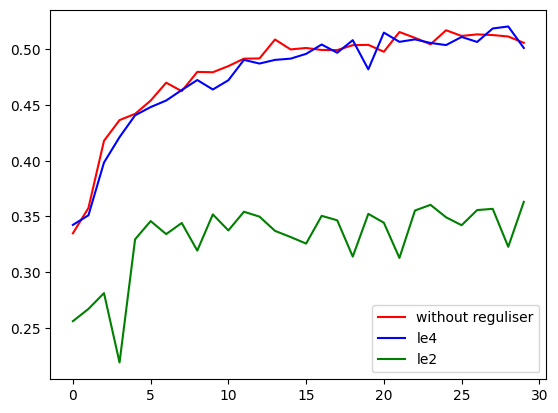

In [17]:
#visualisation
plt.plot(m1.history['val_accuracy'],label='without reguliser',color='red')
plt.plot(m2.history['val_accuracy'],label='le4',color='blue')
plt.plot(m3.history['val_accuracy'],label='le2',color='green')
plt.title='validation accuracy'
plt.xlabel='epochs'
plt.ylable='accuracy'
plt.legend()
plt.show()